# Integrator Testing

Testing various numerical integrators

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(t, y):
    return np.sin(t)
    # return 2*t**2 + 5*t

def df(t, y):
    return np.cos(t)
    # return 4*t + 5

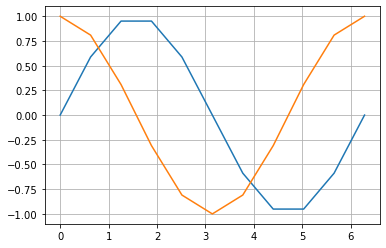

In [4]:
t = np.linspace(0, 2*np.pi, 11)
plt.plot(t, f(t, 0))
plt.plot(t, df(t, 0))
plt.grid()

In [5]:
def eulerIntegrate(df, t0, y0, h):
    return y0 + h * df(t0, y0)

In [6]:
def rk4Integrate(df, t0, y0, h):
    hHalf = h / 2
    k1 = df(t0, y0)
    k2 = df(t0 + hHalf, y0 + h * (k1 / 2))
    k3 = df(t0 + hHalf, y0 + h * (k2 / 2))
    k4 = df(t0 + h, y0 + h * k3)
    
    return y0 + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

In [8]:
def numericalIntegrate(df, integrator, t0, y0, tn, yn, nPoints):
    ts = list()
    ys = list()
    t = t0
    y = y0
    ts.append(t)
    ys.append(y)
    
    h = (tn - t0) / nPoints
    for i in range(nPoints):
        y = integrator(df, t, y, h)
        t = t + h
        ys.append(y)
        ts.append(t)
    
    return np.array(ts), np.array(ys), h

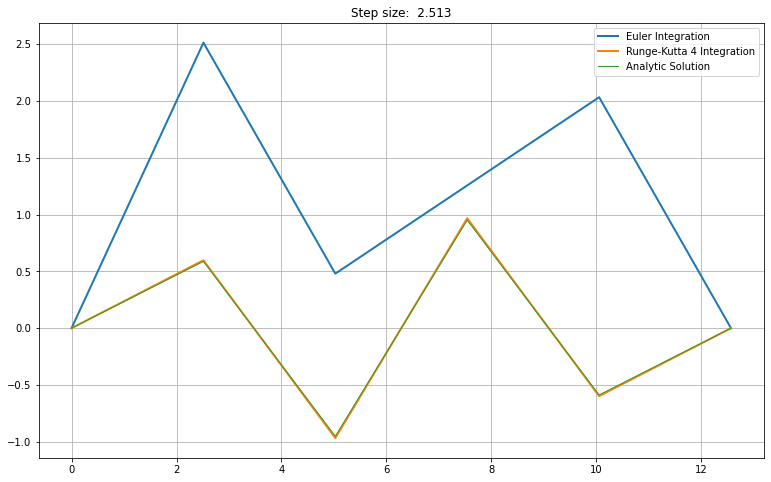

In [10]:
nPoints = 5

ts, ysEuler, h = numericalIntegrate(df, eulerIntegrate, 0, 0, 4*np.pi, 0, nPoints)
ts, ysRK4, h = numericalIntegrate(df, rk4Integrate, 0, 0, 4*np.pi, 0, nPoints)

plt.figure(figsize = (13, 8))
plt.plot(ts, ysEuler, label = "Euler Integration", linewidth=2)
plt.plot(ts, ysRK4, label = "Runge-Kutta 4 Integration", linewidth=2)
plt.plot(ts, f(ts, 0), label = "Analytic Solution", linewidth=1)
plt.title(f"Step size: {h: .3f}")
plt.grid()
plt.legend()